In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from PyAstronomy import pyasl
from scipy.signal import hilbert
%matplotlib inline

In [2]:
# #sine
# f=0.3
# omega=f*2*math.pi
# T=np.linspace(0,100,10000)
# dt=T[1]-T[0]
# x=np.zeros(len(T))
# for i in range(len(T)):
#     x[i]=math.sin(omega*T[i])
# plt.plot(T,x)
# print(dt)

In [3]:
# # gaussian pulse
# T=np.linspace(-10,10,10000)
# x=np.zeros(len(T))
# for i in range(len(T)):
#     x[i]=math.exp(-(T[i]/1)**2)
# plt.plot(T,x)

(500.0, 600.0)

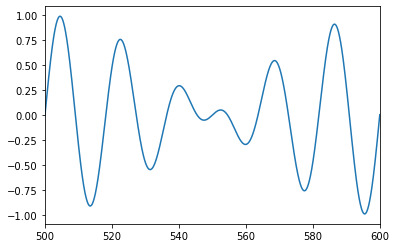

In [4]:
# wave packet (add two wave omega1 omega2 with closed frequency together)
# [0.45 0.5] [0.1 0.12]
omega1=0.05*2*math.pi
omega2=0.06*2*math.pi
Tot=3000
T=np.linspace(0,Tot,50000)
dt=T[1]-T[0]
xa=np.zeros(len(T))
xb=np.zeros(len(T))
x=np.zeros(len(T))
for i in range(len(T)):
    xa[i]=math.sin(omega1*T[i])
    xb[i]=math.sin(omega2*T[i])
    x[i]=(xa[i]+xb[i])/2
plt.plot(T,x)
plt.xlim(500,600)

In [5]:
# # wave packet multiplication two sine wave (multiply two wave (envelop (omega1-omega2)/2 and phase (omega1+omega2)/2))
# omega1=0.05*math.pi
# omega2=0.95*math.pi
# T=np.linspace(0,400,10000)
# dt=T[1]-T[0]
# x_envelop=np.zeros(len(T))
# x_phase=np.zeros(len(T))
# x=np.zeros(len(T))
# for i in range(len(T)):
#     x_envelop[i]=math.sin(omega1*T[i])
#     x_phase[i]=math.sin(omega2*T[i])
#     x[i]=x_envelop[i]*x_phase[i]
# plt.plot(T,x)
# plt.xlim(0,30)

(-150.0, 3150.0)

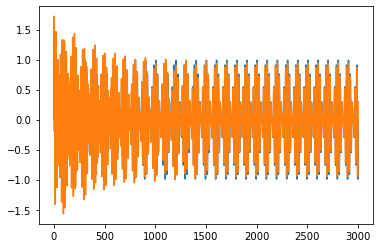

In [6]:
# UNGD output 
tau=2
alpha=5.3
K=5.4
y=np.zeros(len(T))
for i in range(len(T)-1):
    delayi=int(i-tau/dt)
    if delayi>=0:
        dy=dt*(-alpha*y[i]+K*(x[i]-y[int(delayi)]))
    else:
        dy=0
    y[i+1]=y[i]+dy
gamma=np.std(x)/np.std(y)
plt.plot(T,x)
plt.plot(T,y*gamma)
plt.xlim()

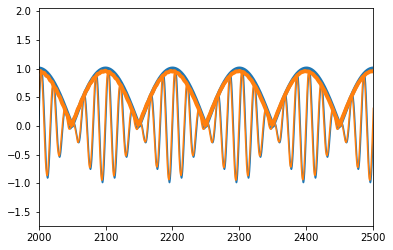

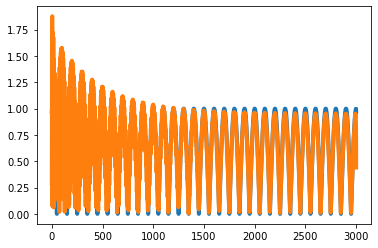

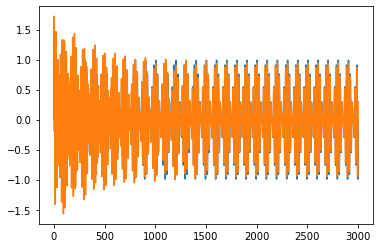

In [7]:
# abstract envelope of wvae packet by Hilbert transform
Hx=hilbert(x)
Hy=hilbert(y*gamma)
amplitude_envelope_x=np.abs(Hx)
amplitude_envelope_y=np.abs(Hy)

plt.plot(T,amplitude_envelope_x,linewidth=4,color='#1f77b4')
plt.plot(T,x,color='#1f77b4')
plt.plot(T,amplitude_envelope_y,linewidth=4,color='#ff7f0e')
plt.plot(T,y*gamma,color='#ff7f0e')
plt.xlim(2000,2500)
plt.show()
plt.plot(T,amplitude_envelope_x,linewidth=4)
plt.plot(T,amplitude_envelope_y,linewidth=4)
plt.xlim()
plt.show()
plt.plot(T,x)
plt.plot(T,y*gamma)
plt.xlim()
plt.show()

[24999, 44443]


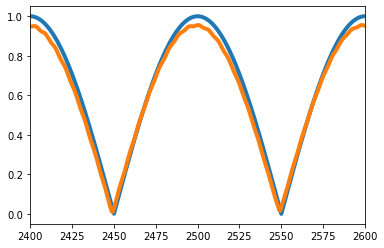

(1441.6398327966558, 2724.9034980699616)

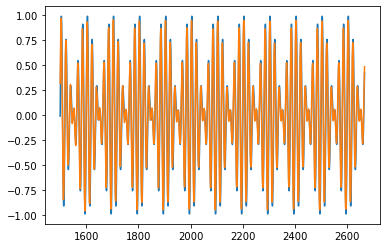

In [8]:
# take less distortion part
irange=[int(Tot/2/dt),int(Tot*8/9/dt)]
print(irange)
encut_x=amplitude_envelope_x[irange[0]:irange[1]]
encut_y=amplitude_envelope_y[irange[0]:irange[1]]
x_cut=x[irange[0]:irange[1]]
y_cut=y[irange[0]:irange[1]]*gamma
T_cut=T[irange[0]:irange[1]]
plt.plot(T_cut,encut_x,linewidth=4)
plt.plot(T_cut,encut_y,linewidth=4)
plt.xlim(2400,2600)
plt.show()
plt.plot(T_cut,x_cut)
plt.plot(T_cut,y_cut)
plt.xlim()

In [9]:
# calculate cross correlation of wave packet of output and input
envelope_corr=np.correlate(encut_x,encut_y,'full')
index_of_zero=(len(envelope_corr)+1)/2
negshift=-3
posshift=3
# timeshift=np.linspace(negshift,posshift,(posshift-negshift)/dt+1)
# bitshift=np.zeros(len(timeshift))
bitshift=np.linspace(int(negshift/dt),int(posshift/dt),round((int(posshift/dt)-int(negshift/dt))/2)+1)
bitshift=bitshift.astype(int)
shift_index=index_of_zero*np.ones(len(bitshift))
shift_index=shift_index+bitshift
shift_index=shift_index.astype(int)
timeshift=bitshift*dt

-0.06000120002400048


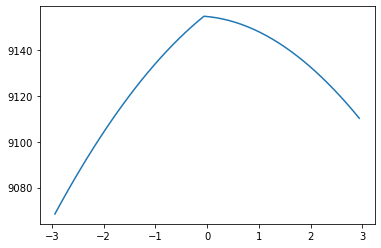

In [10]:
encor=envelope_corr[shift_index]
plt.plot(timeshift,encor)
plt.xlim()
imax=np.argmax(encor)
print(timeshift[imax])

In [11]:
# calculate cross correlation of phase of input and output
phase_corr=np.correlate(x_cut,y_cut,'full')
index_of_zero=(len(phase_corr)+1)/2
negshift=-100
posshift=100
timeshift=np.linspace(negshift,posshift,int((posshift-negshift)/dt)+1)
bitshift=np.zeros(len(timeshift))
for i in range(len(timeshift)):
    bitshift[i]=timeshift[i]/dt
    bitshift[i]=int(bitshift[i])
shift_index=index_of_zero*np.ones(len(bitshift))
shift_index=shift_index+bitshift
shift_index=shift_index.astype(int)

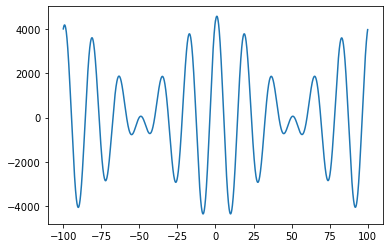

In [12]:
plt.plot(timeshift,phase_corr[shift_index])